In [1]:
import numpy as np
import os
import pickle
import trueskill

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline

In [2]:
# Customize matplotlib appearance
sns.set_style("white", {'axes.grid': False, 'grid.color': '.9', 'grid.linestyle': u'--'})
matplotlib.rc('axes', titlesize=18, labelsize=18)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

# matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

## Load results

In [9]:
runs = 5

ret_WoLF, ret_Q_learner, ret_BRAT, ret_META_NASH, ret_LOLA, ret_PG = {}, {}, {}, {}, {}, {}
for bs in [64]:
    # WoLF-PHC
    ret_WoLF[bs] = np.stack([np.load("results/ipd_bs%d_nl/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    # Q Learner
    ret_Q_learner[bs] = np.stack([np.load("results/ipd_bs%d_original/run-%d/rets.npy" % (bs, r + 1))[:200] for r in range(runs)])
    # Meta-NASH
    ret_META_NASH[bs] = np.stack([np.load("results/ipd_bs%d_magic/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    # Best Response Agent
    ret_BRAT[bs] = np.stack([np.load("results/ipd_bs%d_3inner/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    # LOLA with magic and OM
    ret_LOLA[bs] = np.stack([np.load("results/ipd_bs%d_2inner_om/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])
    # Policy Gradient (PG)
    ret_PG[bs] = np.stack([np.load("results/ipd_bs%d_nomagic/run-%d/rets.npy" % (bs, r + 1)) for r in range(runs)])


## Plot results

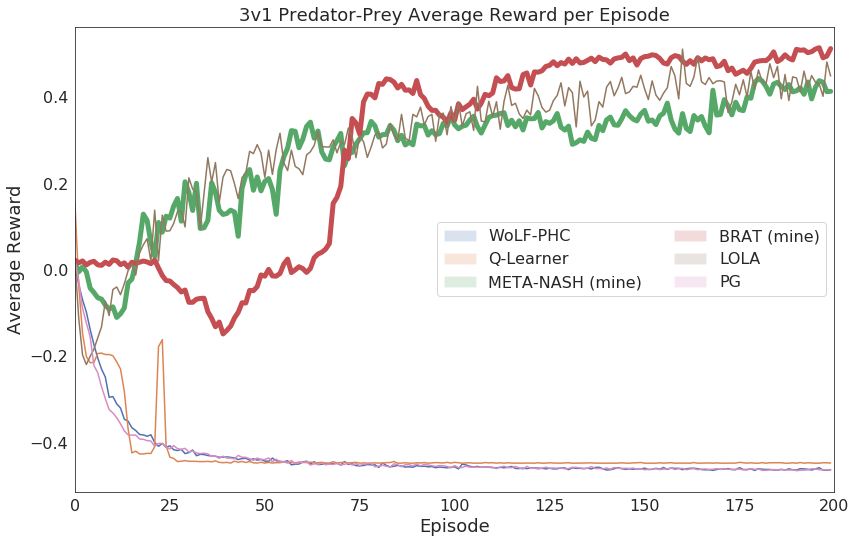

In [10]:
bs = 64

fig, ax = plt.subplots(1, 1, figsize=(12., 9.))
colors = sns.color_palette('deep')
mean =  np.sum( (ret_WoLF[bs][1, : ,0] + ret_WoLF[bs][1, : ,1])  + (ret_Q_learner[bs][1, : ,0] + ret_Q_learner[bs][1, : ,1]) + (ret_META_NASH[bs][1, : ,0] + ret_META_NASH[bs][1, : ,1]) + (ret_BRAT[bs][1, : ,0] 
+ ret_BRAT[bs][1, : ,1]) + (ret_LOLA[bs][1, : , 0] + ret_LOLA[bs][1, : ,1]))/(5*2*200)

sns.tsplot((ret_WoLF[bs][1, : ,0] + ret_WoLF[bs][1, : ,1]) / 2 - mean, color=colors[0], ci=0, ax=ax)
sns.tsplot((ret_Q_learner[bs][1, : ,0] + ret_Q_learner[bs][1, : ,1]) / 2 - mean, color=colors[1], ci=0, ax=ax)
sns.tsplot((ret_META_NASH[bs][1, : ,0] + ret_META_NASH[bs][1, : ,1]) / 2 - mean, color=colors[2], ci=0, ax=ax, linewidth = 5.0)
sns.tsplot((ret_BRAT[bs][1, : ,0] + ret_BRAT[bs][1, : ,1]) / 2 - mean, color=colors[3], ci=0, ax=ax, linewidth = 5.0)
sns.tsplot((ret_LOLA[bs][1, : ,0] + ret_LOLA[bs][1, : ,1]) / 2 - mean, color=colors[5], ci=0, ax=ax)
sns.tsplot((ret_PG[bs][1, : ,0] + ret_PG[bs][1, : ,1]) / 2 - mean, color=colors[6], ci=0, ax=ax)

ax.set_title("3v1 Predator-Prey Average Reward per Episode")
ax.set_xlim([0, 200])

# ax.set_ylim([-2., -1.])
ax.set_ylabel("Average Reward")
ax.set_xlabel("Episode")
ax.legend(['WoLF-PHC', 'Q-Learner', 'META-NASH (mine)', 'BRAT (mine)', 'LOLA', 'PG'], ncol=2, loc='best')

fig.tight_layout(rect=[0, 0, 1, .85])
fig.savefig("3v1_predator-prey.pdf")